In [71]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [72]:
plt.style.use('seaborn-v0_8-whitegrid')

In [73]:
#Load data 
df = pd.read_excel('dataset/P1_MCS_Workspace.xlsx', sheet_name='C2-25-34(MY)')

In [74]:
# Clean data 
# Drop unnamed columns 
print(df.columns.tolist())
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Z-Score AI', 'AI Outlier(Y/N)', 'Z-Score SS', 'SS Outlier(Y/N)', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13']


In [75]:
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           5  Female   31                  17                      40   
1          10  Female   30                  19                      72   
2          14  Female   24                  20                      77   
3          22    Male   25                  24                      73   
4          24    Male   31                  25                      73   

   Z-Score AI AI Outlier(Y/N)  Z-Score SS SS Outlier(Y/N)  
0   -1.771816               N   -0.978521               N  
1   -1.701978               N    0.366653               N  
2   -1.667059               N    0.576837               N  
3   -1.527383               N    0.408690               N  
4   -1.492464               N    0.408690               N  


In [76]:
# Checking if any null values exist
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Z-Score AI                0
AI Outlier(Y/N)           0
Z-Score SS                0
SS Outlier(Y/N)           0
dtype: int64


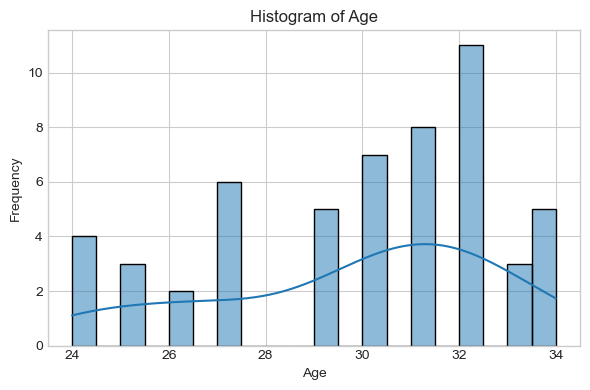

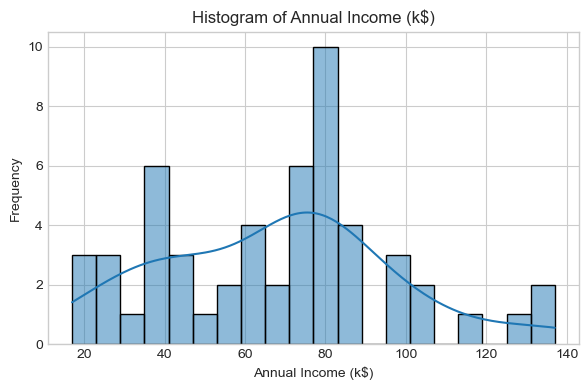

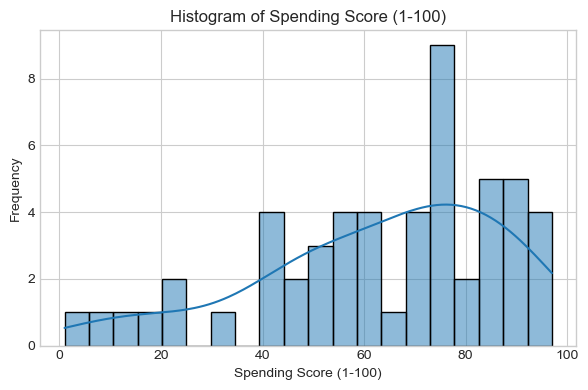

In [77]:
# Explore 
numerical_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
#Histograms 
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'Histogram of {col}')
    plt.show()

    

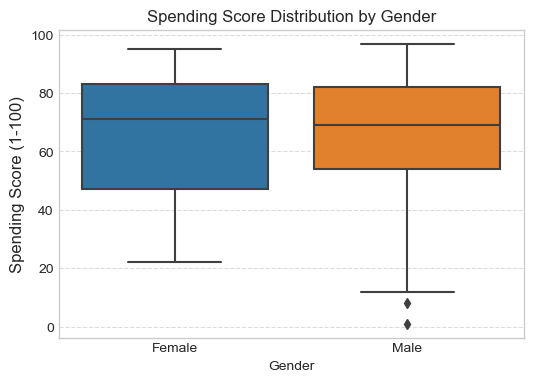

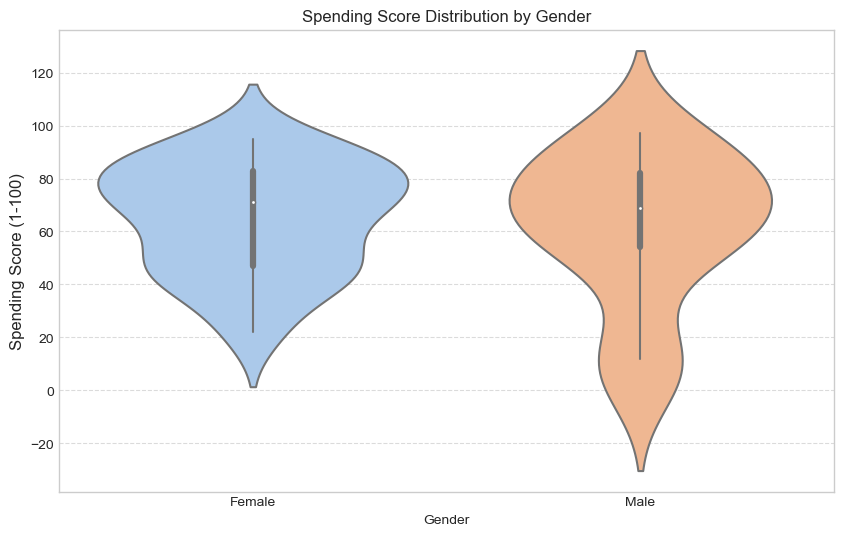

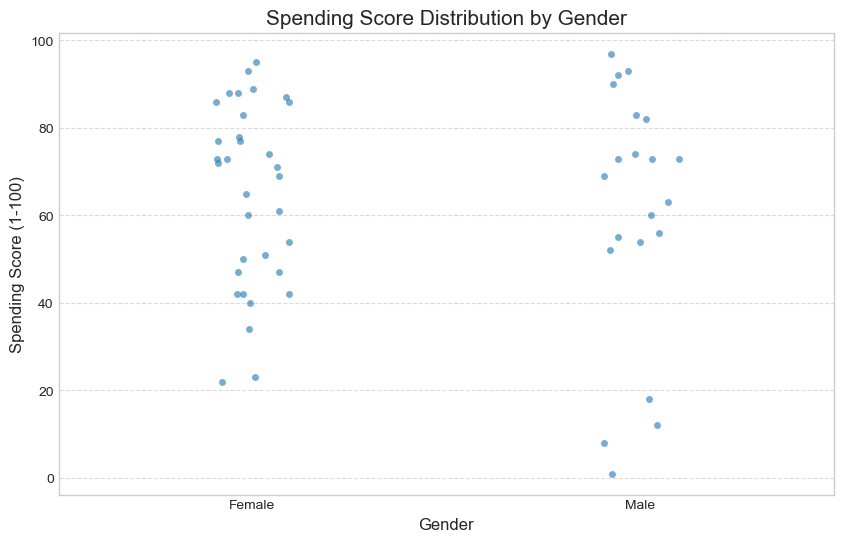

In [78]:
# Investigate correlations between gender and spending score/annual income
plt.figure(figsize=(6,4))
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df)
plt.title('Spending Score Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('gender_spending_bp.png')
plt.show()

plt.figure(figsize=(10,6))
sns.violinplot(x='Gender', y='Spending Score (1-100)', data=df, palette='pastel')
plt.title('Spending Score Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('gender_spending_vp.png')
plt.show()

plt.figure(figsize=(10,6))
sns.stripplot(x='Gender', y='Spending Score (1-100)', data=df, jitter=True, alpha=0.6)
plt.title('Spending Score Distribution by Gender', fontsize=15)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('gender_spending_sp.png')
plt.show()

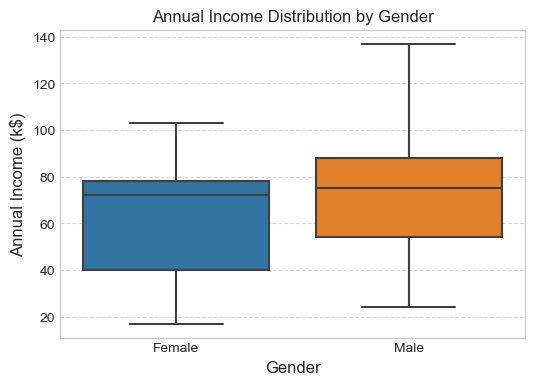

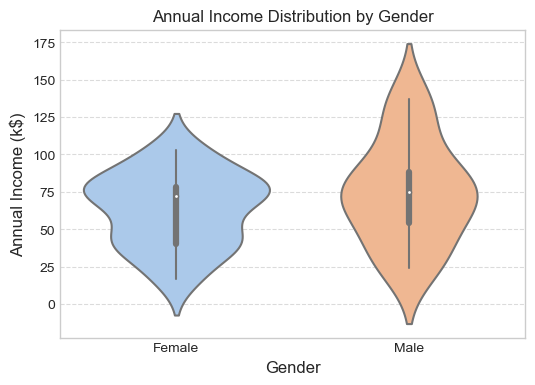

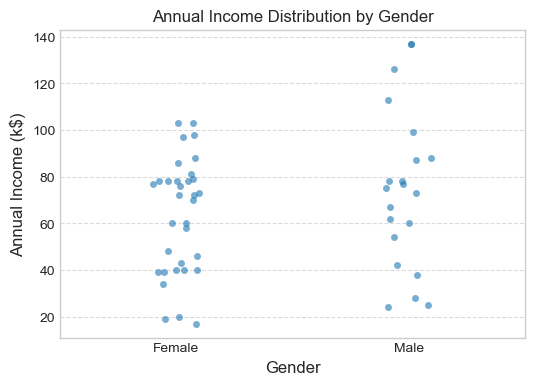

In [79]:
# Investigating correlation between Gender and Annual Income
plt.figure(figsize=(6,4))
sns.boxplot(x='Gender', y='Annual Income (k$)', data=df)
plt.title('Annual Income Distribution by Gender')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Annual Income (k$)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('gender_income_bp.png')
plt.show()

plt.figure(figsize=(6,4))
sns.violinplot(x='Gender', y='Annual Income (k$)', data=df, palette='pastel')
plt.title('Annual Income Distribution by Gender')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Annual Income (k$)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('gender_income_vp.png')
plt.show()

plt.figure(figsize=(6,4))
sns.stripplot(x='Gender', y='Annual Income (k$)', data=df, jitter=True, alpha=0.6)
plt.title('Annual Income Distribution by Gender')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Annual Income (k$)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('gender_income_sp.png')
plt.show()


In [80]:
# Calculate summary statistics by Gender 
gender_stats = df.groupby('Gender')['Spending Score (1-100)'].describe()
print("Spending Score Statistics by Gender")
print(gender_stats)

Spending Score Statistics by Gender
        count       mean        std   min   25%   50%   75%   max
Gender                                                           
Female   33.0  64.818182  20.759718  22.0  47.0  71.0  83.0  95.0
Male     21.0  60.857143  28.780698   1.0  54.0  69.0  82.0  97.0


In [81]:
# Count of customers in each gender category 
gender_counts = df['Gender'].value_counts()
print("\nCustomer Count by Gender")
print(gender_counts)


Customer Count by Gender
Gender
Female    33
Male      21
Name: count, dtype: int64


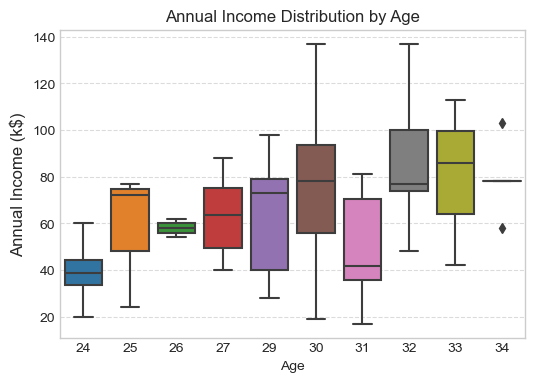

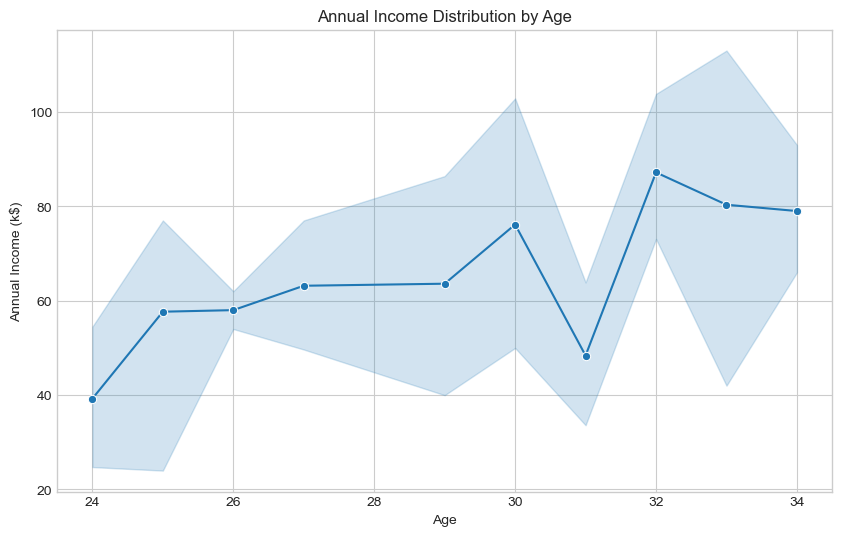

In [82]:
# Checking correlation between Age and Annual Income 
plt.figure(figsize=(6,4))
sns.boxplot(x='Age', y='Annual Income (k$)', data=df)
plt.title('Annual Income Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('age_income_bp.png')
plt.show()

plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Age', y='Annual Income (k$)', marker='o')
plt.title('Annual Income Distribution by Age', fontsize=12)
plt.savefig('age_income_ln.png')
plt.show()

In [83]:
# Calculate summary statistics by Age
age_stats = df.groupby('Age')['Annual Income (k$)'].describe()
print('Annual Income Statistics by Age')
print(age_stats)

Annual Income Statistics by Age
     count       mean        std   min   25%   50%     75%    max
Age                                                              
24     4.0  39.250000  16.357975  20.0  33.5  38.5   44.25   60.0
25     3.0  57.666667  29.263174  24.0  48.0  72.0   74.50   77.0
26     2.0  58.000000   5.656854  54.0  56.0  58.0   60.00   62.0
27     6.0  63.166667  18.400181  40.0  49.5  63.5   75.25   88.0
29     5.0  63.600000  28.866936  28.0  40.0  73.0   79.00   98.0
30     7.0  76.142857  39.612408  19.0  56.0  78.0   93.50  137.0
31     8.0  48.375000  23.323425  17.0  35.5  41.5   70.50   81.0
32    11.0  87.181818  26.809768  48.0  74.0  77.0  100.00  137.0
33     3.0  80.333333  35.837597  42.0  64.0  86.0   99.50  113.0
34     5.0  79.000000  15.968719  58.0  78.0  78.0   78.00  103.0


In [84]:
# Count of customers in each Age category
age_counts = df['Age'].value_counts()
print("\nCustomer Count by Age")
print(age_counts)


Customer Count by Age
Age
32    11
31     8
30     7
27     6
29     5
34     5
24     4
25     3
33     3
26     2
Name: count, dtype: int64


In [85]:
# Confirming statistically if RM137k is an outlier in each group
age_30_income = df[df['Age'] == 30]['Annual Income (k$)']
Q1 = age_30_income.quantile(0.25)
Q3 = age_30_income.quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# Check for outliers 
outliers = age_30_income[age_30_income > upper_bound]
print(outliers)

age_32_income = df[df['Age'] == 32]['Annual Income (k$)']
Q1 = age_30_income.quantile(0.25)
Q3 = age_30_income.quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# Check for outliers 
outliers2 = age_32_income[age_32_income > upper_bound]
print(outliers2) 
# Shows $137k is NOT a statistical outlier 

Series([], Name: Annual Income (k$), dtype: int64)
Series([], Name: Annual Income (k$), dtype: int64)


In [86]:
high_earners = df[df['Annual Income (k$)'] >= 130]
print(high_earners[['Age', 'Annual Income (k$)']])

# Shows they are not statistical outliers, but rare. Likely represents a niche high-income segment.


    Age  Annual Income (k$)
52   32                 137
53   30                 137


In [87]:
df[df['Annual Income (k$)'] == 137]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Z-Score AI,AI Outlier(Y/N),Z-Score SS,SS Outlier(Y/N)
52,199,Male,32,137,18,2.418464,N,-1.903328,N
53,200,Male,30,137,83,2.418464,N,0.829057,N


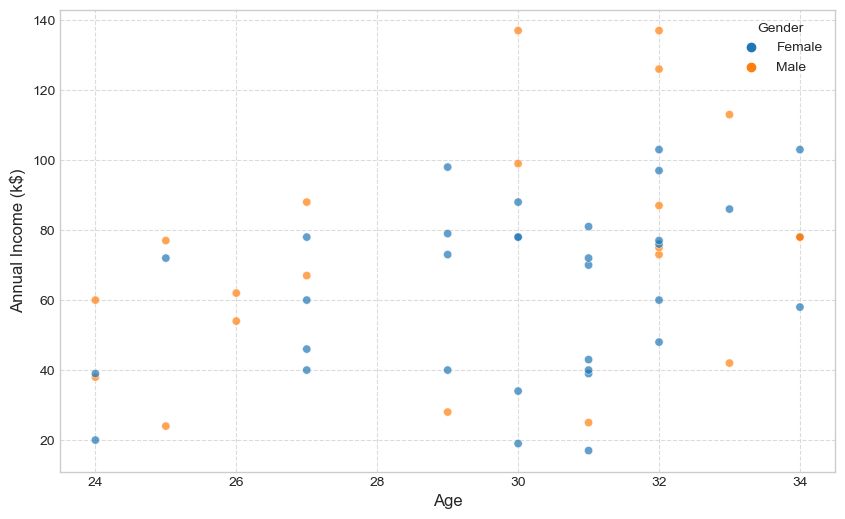

In [89]:
# Explore correlation between age vs annual income, colored by Gender 
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Gender', data=df, alpha=0.7)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Annual Income (k$)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Gender')
plt.show()

In [90]:
# Filter female customers 
male_df =  df[df['Gender']== 'Male']

# Calculate IQR
Q1 = male_df['Annual Income (k$)'].quantile(0.25)
Q3 = male_df['Annual Income (k$)'].quantile(0.75)

IQR = Q3-Q1

# Define Bounds 
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q2 + 1.5 * IQR

# Find Outliers 
outliers = male_df[(male_df['Annual Income (k$)'] < lower_bound) |
                  (male_df['Annual Income (k$)'] > upper_bound)]

print("Outliers in Male Annual Income:\n", outliers)

Outliers in Male Annual Income:
 Empty DataFrame
Columns: [CustomerID, Gender, Age, Annual Income (k$), Spending Score (1-100), Z-Score AI, AI Outlier(Y/N), Z-Score SS, SS Outlier(Y/N)]
Index: []


In [54]:
df['AI Outlier (Z > 2.5)?'] = df['Z-Score AI'].apply(lambda x: 'Y' if abs(x) > 2.5 else 'N')
print(df[['CustomerID', 'Gender', 'Annual Income (k$)', 'Z-Score AI', 'AI Outlier (Z > 2.5)?']].head())

# Check if there are any outliers 
outliers_count = df[df['AI Outlier (Z > 2.5)?'] == 'Y'].shape[0]
# Print the results 
print(f"Number of outliers detected: {outliers_count}")

   CustomerID  Gender  Annual Income (k$)  Z-Score AI AI Outlier (Z > 2.5)?
0           5  Female                  17   -1.771816                     N
1          10  Female                  19   -1.701978                     N
2          14  Female                  20   -1.667059                     N
3          22    Male                  24   -1.527383                     N
4          24    Male                  25   -1.492464                     N
Number of outliers detected: 0
